# VGG16 on Cifar10 Dataset

#### Importing Necessary Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Convolution2D,MaxPooling2D,Dropout,Dense,Flatten, GlobalAveragePooling2D
from keras import models,losses,optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

Using TensorFlow backend.


#### Loading the dataset and performing inbuilt pre-processing

In [2]:
from tensorflow.keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_train = ohe.fit_transform(y_train).toarray().astype(int)
y_test = ohe.transform(y_test).toarray().astype(int)
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

170500096/170498071 [==============================] - 6s 0us/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


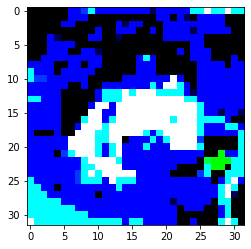

In [3]:
plt.imshow(X_train[0])

#### Function to resize the input image
    - Intitial size : (32x32)
    - Final size : (100x100)

In [0]:
def resize_data(data):
    data_upscaled = []
    for i, img in enumerate(data):
        large_img = cv2.resize(img, dsize=(100,100))
        data_upscaled.append(large_img)
    return data_upscaled
X_train = np.array(resize_data(X_train))
X_test = np.array(resize_data(X_test))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5.90979


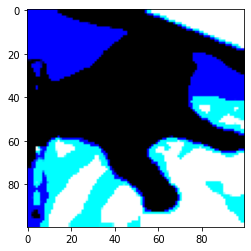

In [5]:
import matplotlib.pyplot as plt
print(X_train.mean())
plt.imshow(X_train[56])

In [6]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(50000, 100, 100, 3) (10000, 100, 100, 3) (50000, 10) (10000, 10)


#### Model Building

In [7]:
base = VGG16(include_top = False,weights='imagenet',input_shape = (100,100,3))
model = models.Sequential()
model.add(base)
model.add(GlobalAveragePooling2D())
model.add(Dense(4096, activation='relu', name='Dense_Intermediate'))
model.add(Dropout(0.5, name='Dropout_Regularization'))
model.add(Dense(10, activation='softmax', name='Output'))

58892288/58889256 [==============================] - 2s 0us/step


#### Freezing the layers in base model

In [0]:
for cnnlayer in model.layers[0].layers:
    cnnlayer.trainable = False
model.layers[0].trainable = False

In [0]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
Dense_Intermediate (Dense)   (None, 4096)              2101248   
_________________________________________________________________
Dropout_Regularization (Drop (None, 4096)              0         
_________________________________________________________________
Output (Dense)               (None, 10)                40970     
Total params: 16,856,906
Trainable params: 2,142,218
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
model.fit(X_train,y_train,epochs=10,batch_size=500,validation_data=(X_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 128s 3ms/step - loss: 1.0561 - accuracy: 0.7628 - val_loss: 0.4855 - val_accuracy: 0.8321
Epoch 2/10
50000/50000 [==============================] - 116s 2ms/step - loss: 0.4300 - accuracy: 0.8544 - val_loss: 0.4683 - val_accuracy: 0.8384
Epoch 3/10
50000/50000 [==============================] - 115s 2ms/step - loss: 0.3444 - accuracy: 0.8814 - val_loss: 0.4441 - val_accuracy: 0.8519
Epoch 4/10
50000/50000 [==============================] - 115s 2ms/step - loss: 0.2807 - accuracy: 0.9038 - val_loss: 0.4385 - val_accuracy: 0.8569
Epoch 5/10
50000/50000 [==============================] - 115s 2ms/step - loss: 0.2371 - accuracy: 0.9169 - val_loss: 0.4401 - val_accuracy: 0.8561
Epoch 6/10
50000/50000 [==============================] - 115s 2ms/step - loss: 0.1958 - accuracy: 0.9326 - val_loss: 0.4612 - val_accuracy: 0.8534
Epoch 7/10
50000/50000 [==============================] - 115s

#### Performance Evaluation

In [0]:
from sklearn.metrics import precision_score,recall_score,log_loss

In [13]:
y_pred = model.predict(X_test)
y_pred = y_pred.round().astype(int)
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [15]:
classwise_precision = precision_score(y_test,y_pred, average=None)
for i in range(len(classwise_precision)):
  print("Precision for class {} = {}".format(i,classwise_precision[i]))
print("Mean Precision = ",classwise_precision.mean())

Precision for class 0 = 0.9033613445378151
Precision for class 1 = 0.9369747899159664
Precision for class 2 = 0.8456104944500504
Precision for class 3 = 0.7884828349944629
Precision for class 4 = 0.843322818086225
Precision for class 5 = 0.7789179104477612
Precision for class 6 = 0.9078674948240165
Precision for class 7 = 0.9161220043572985
Precision for class 8 = 0.9099009900990099
Precision for class 9 = 0.9109311740890689
Mean Precision =  0.8741491855801675


In [16]:
classwise_recall = recall_score(y_test,y_pred, average=None)
for i in range(len(classwise_recall)):
  print("Recall for class {} = {}".format(i,classwise_recall[i]))
print("Mean Recall = ",classwise_recall.mean())

Recall for class 0 = 0.86
Recall for class 1 = 0.892
Recall for class 2 = 0.838
Recall for class 3 = 0.712
Recall for class 4 = 0.802
Recall for class 5 = 0.835
Recall for class 6 = 0.877
Recall for class 7 = 0.841
Recall for class 8 = 0.919
Recall for class 9 = 0.9
Mean Recall =  0.8476000000000001


In [17]:
print("Log Loss = ",log_loss(y_test,y_pred))

Log Loss =  4.306294640917473
